In [89]:

# import tensorflow as tf
%reload_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
from neuralNet import NeuralNet

import matplotlib.pyplot as plt
import seaborn as sns

from search import gridSearchCV

In [2]:
def vectorized_result(j):

    e = np.zeros((10, 1))
    e[j] = 1.0
    return e


In [38]:
from neuron import tanh_neuron,soft_plus

soft_plus.f_prime(np.array([1,-2,3]))

array([0.73105858, 0.11920292, 0.95257413])

In [3]:
data = pd.read_csv('./../data/part1.csv',header=None)

X = np.array(data.iloc[:, :784])
Y = np.array(data.iloc[:, -1], dtype=np.int32)
n = X.shape[0]
idx = np.arange(0, len(X))
np.random.shuffle(idx)
frac = int(0.8*len(X))
train_x = [np.reshape(x, (-1, 1)) for x in X[idx[:frac]]]
train_y = [vectorized_result(y) for y in Y[idx[:frac]]]
train_data = list(zip(train_x, train_y))
test_x = [np.reshape(x, (-1, 1)) for x in X[idx[frac:]]]
test_y = Y[idx[frac:]]
test_data = list(zip(test_x, test_y))



In [98]:
# Grid search CV 
params = {
    'neuron_type': ['sigmoid'],
    'epoch':[10],
    'eta':[1e0],
    'cost':['cross_entropy_cost','quadratic_cost'],
    'sizes':[[784,30,10]],
    'batch_size':[1,4,8,16],
    'lmbda':[0]
    
}

grid = gridSearchCV(params,cv=5)
grid.fit(X,Y,)


Configuration : {'batch_size': 1, 'cost': 'cross_entropy_cost', 'epoch': 10, 'eta': 1.0, 'lmbda': 0, 'neuron_type': 'sigmoid', 'sizes': [784, 30, 10]}
Scores :  {'batch_size': 1, 'cost': 'cross_entropy_cost', 'epoch': 10, 'eta': 1.0, 'lmbda': 0, 'neuron_type': 'sigmoid', 'sizes': [784, 30, 10], 'train_accuracy': 0.92575, 'train_cost': 0.48363799783690775, 'test_accuracy': 0.8666666666666667, 'test_cost': 0.9034319985662452}
Configuration : {'batch_size': 1, 'cost': 'quadratic_cost', 'epoch': 10, 'eta': 1.0, 'lmbda': 0, 'neuron_type': 'sigmoid', 'sizes': [784, 30, 10]}
Scores :  {'batch_size': 1, 'cost': 'quadratic_cost', 'epoch': 10, 'eta': 1.0, 'lmbda': 0, 'neuron_type': 'sigmoid', 'sizes': [784, 30, 10], 'train_accuracy': 0.9407499999999999, 'train_cost': 0.050494196350547194, 'test_accuracy': 0.8580000000000001, 'test_cost': 0.11903354002830682}
Configuration : {'batch_size': 4, 'cost': 'cross_entropy_cost', 'epoch': 10, 'eta': 1.0, 'lmbda': 0, 'neuron_type': 'sigmoid', 'sizes': [78

KeyboardInterrupt: 

In [ ]:
nn =NeuralNet([784,30,10],cost="cross_entropy_cost",neuron_type="relu")
train_accuracy, train_cost, test_accuracy, test_cost=nn.fit(
    train_data, epochs=40, mini_batch_size=1, eta=5e-2, test_data=test_data,lmda=5e-2,decay_rate=2,decay_after_epoch=5)


<AxesSubplot:>

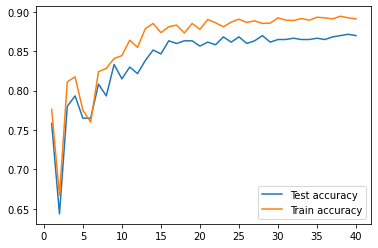

In [68]:
fig,ax =plt.subplots()
sns.lineplot(x=np.arange(1,len(test_accuracy)+1),y=test_accuracy,ax=ax,label='Test accuracy')
sns.lineplot(x=np.arange(1,len(test_accuracy)+1),y=train_accuracy,ax=ax,label='Train accuracy')

<AxesSubplot:>

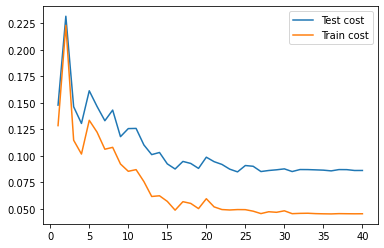

In [69]:
fig, ax = plt.subplots()
sns.lineplot(x=np.arange(1, len(test_accuracy)+1),
             y=np.log10(test_cost), ax=ax, label='Test cost')
sns.lineplot(x=np.arange(1, len(test_accuracy)+1), y=np.log10(train_cost),
             ax=ax, label='Train cost')


In [22]:
import tensorflow as tf

from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# data
data = pd.read_csv('./../data/part1.csv', header=None)
X = np.array(data.iloc[:, :784])
Y = np.array(data.iloc[:, -1], dtype=np.int32)
n = X.shape[0]
idx = np.arange(0, n)
np.random.shuffle(idx)
frac = int(0.8*len(X))
train_images = np.array([x.reshape(28,28) for x  in X[idx[:frac]]])
train_labels = Y[idx[:frac]]

val_images = np.array([x.reshape(28, 28) for x in X[idx[frac:]]])
val_labels = Y[idx[frac:]]






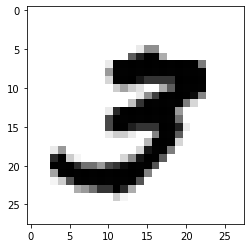

In [23]:
plt.imshow(train_images[1],cmap=plt.cm.binary)


In [21]:
train_images.shape

(2400, 28, 28)

In [30]:
# Creating model

model = keras.Sequential([keras.layers.Flatten(input_shape=(28, 28)),
                          keras.layers.Dense(30, activation='relu'),
                          keras.layers.Dense(10, activation='softmax'),
                          ])

model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])


history= model.fit(train_images, train_labels, epochs=50,validation_data=(val_images,val_labels))


Epoch 1/50
75/75 [==============================] - 1s 5ms/step - loss: 2.1131 - accuracy: 0.3154 - val_loss: 1.9218 - val_accuracy: 0.3883
Epoch 2/50
75/75 [==============================] - 0s 2ms/step - loss: 1.6726 - accuracy: 0.5625 - val_loss: 1.5076 - val_accuracy: 0.6267
Epoch 3/50
75/75 [==============================] - 0s 2ms/step - loss: 1.2983 - accuracy: 0.7021 - val_loss: 1.2013 - val_accuracy: 0.7133
Epoch 4/50
75/75 [==============================] - 0s 2ms/step - loss: 1.0493 - accuracy: 0.7675 - val_loss: 1.0059 - val_accuracy: 0.7783
Epoch 5/50
75/75 [==============================] - 0s 2ms/step - loss: 0.8899 - accuracy: 0.7929 - val_loss: 0.8813 - val_accuracy: 0.7883
Epoch 6/50
75/75 [==============================] - 0s 2ms/step - loss: 0.7849 - accuracy: 0.8154 - val_loss: 0.7911 - val_accuracy: 0.8000
Epoch 7/50
75/75 [==============================] - 0s 2ms/step - loss: 0.7082 - accuracy: 0.8321 - val_loss: 0.7346 - val_accuracy: 0.8067
Epoch 8/50
75/75 [==

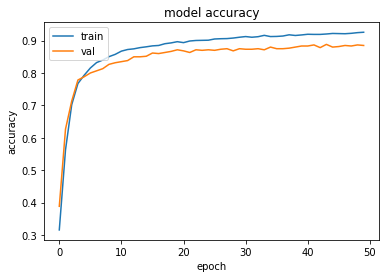

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


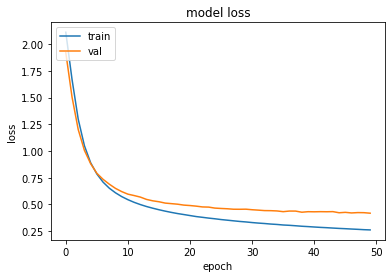

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [86]:
indexes = np.arange(0,5)
np.random.shuffle(indexes)
splits = np.array_split(indexes, 2)
# print(splits)
np.hstack(np.delete(splits, 1, axis=0))


array([1, 0, 2])